In [1]:
import emat
emat.versions()

emat 0.6.4, plotly 5.24.1


# Identifying Model Problems

Once a series of experiments has been conducted for a core model, it
is suggested that an analyst review the results to confirm that the 
model is behaving as expected.  TMIP-EMAT provides some visualization
tools to review results in a graphical manner, which is a generally 
convenient method to review this experimental data.

To demonstrate these tools, we will use the Road Test example model included
in TMIP-EMAT.  We can quickly construct and run a design of experiments
to exercise this model and populate some results to visualize, and in 
this example we will use an intentionally broken model input, to demonstrate
one way that bad results might manifest.

In [2]:
import emat.examples
scope, db, model = emat.examples.road_test(yamlfile='road_test_corrupt.yaml')
design = model.design_experiments()
results = model.run_experiments(design)

The "corrupt" scope for the Road Test model includes a policy lever to set
the lane width for the link.  You might expect that increasing the lane 
width might increase the effective capacity on the link, but as coded any
deviation from exactly 10.0 feet will result in substantial extra delay in
the build travel time, regardless of any other factors.  Running the experiments
with this broken input will invalidate the entire set of results, but here
we'll assume that we don't know *a priori* that the lane width parameter is 
broken.

Given this set of experimental results, we can display a scatter plot matrix
to see the results.  This is a collection of two-dimensional plots, each
showing a contrast between two factors, typically an input parameter (i.e. 
an uncertainty or a policy lever) and an output performance measure, although
it is also possible to plot inputs against inputs or outputs against outputs.

The `display_experiments` function in the `emat.analysis` sub-package can 
automatically create a scatter plot matrix that crosses every parameter with
every measure, simply by providing the scope and the results.  By default, 
plots that display levers are shown in blue, plots that show uncertainties
are in red. 

No Build Time

<xmle.Elem 'img' with 0 children>
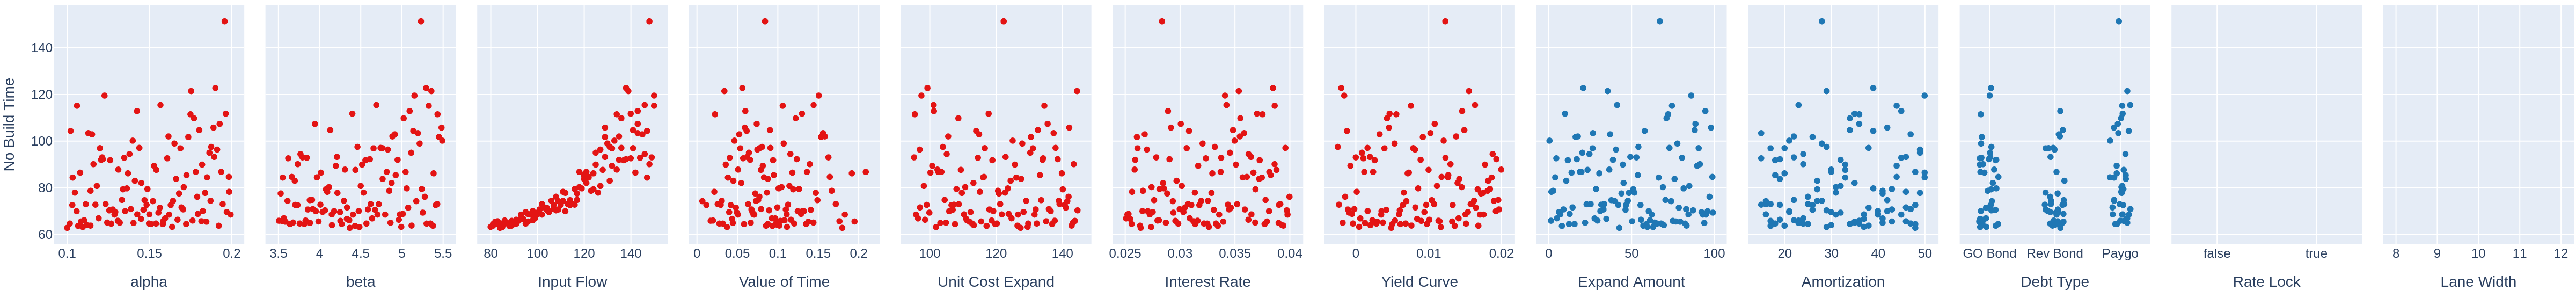

Build Time

<xmle.Elem 'img' with 0 children>
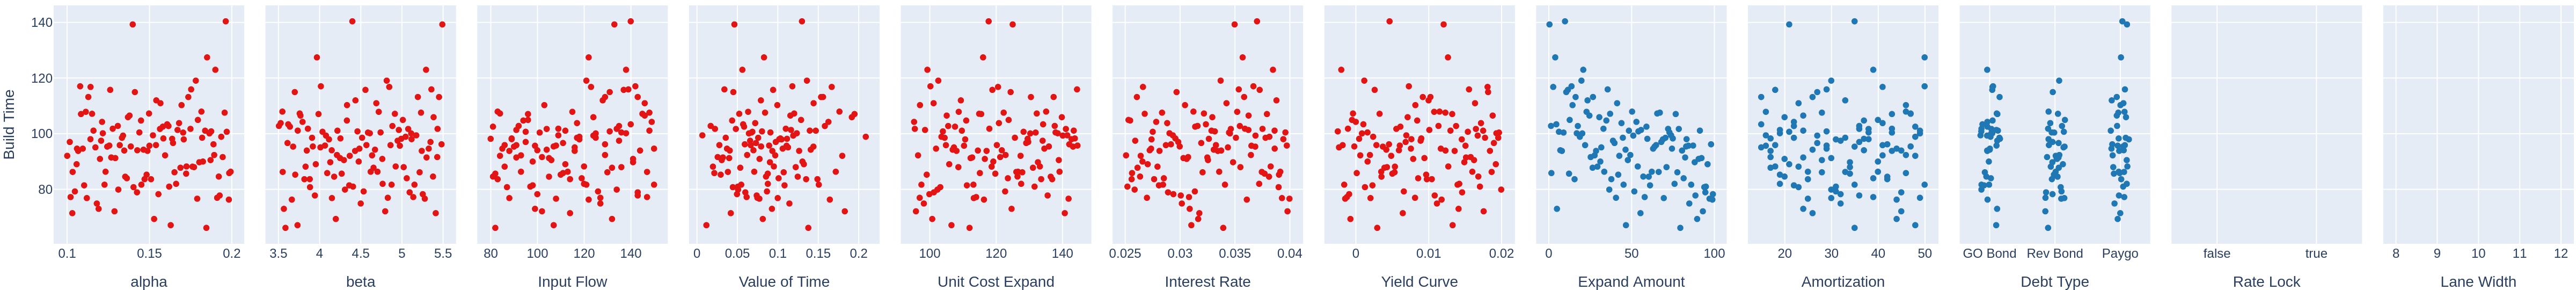

Time Savings

<xmle.Elem 'img' with 0 children>
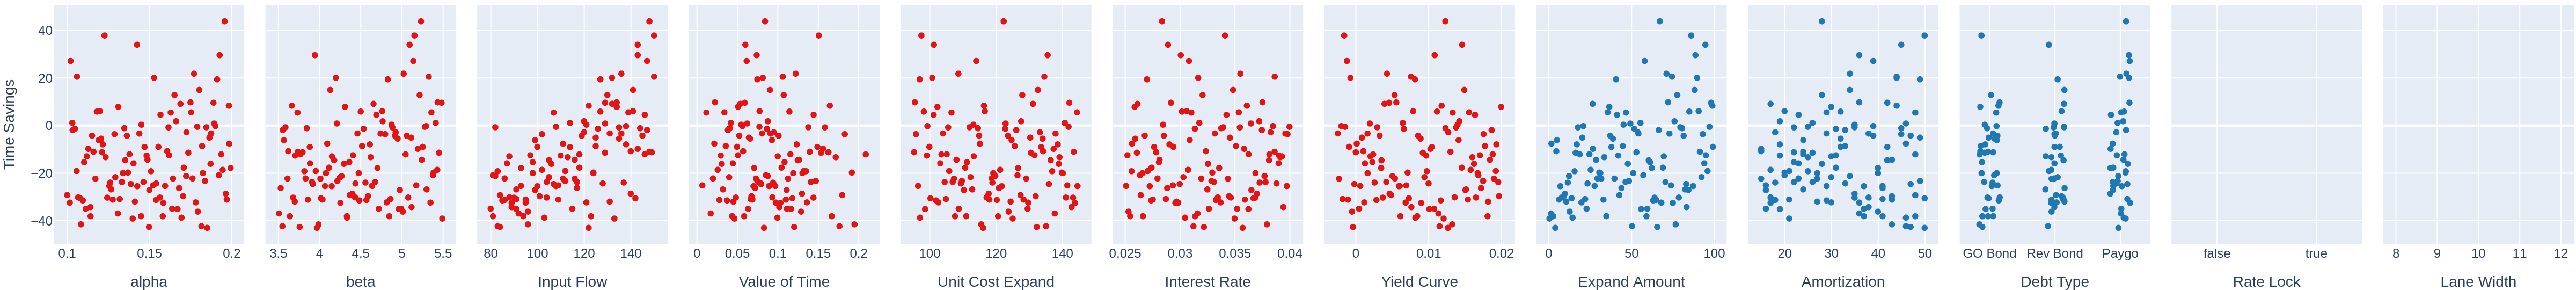

Value Time Save

<xmle.Elem 'img' with 0 children>
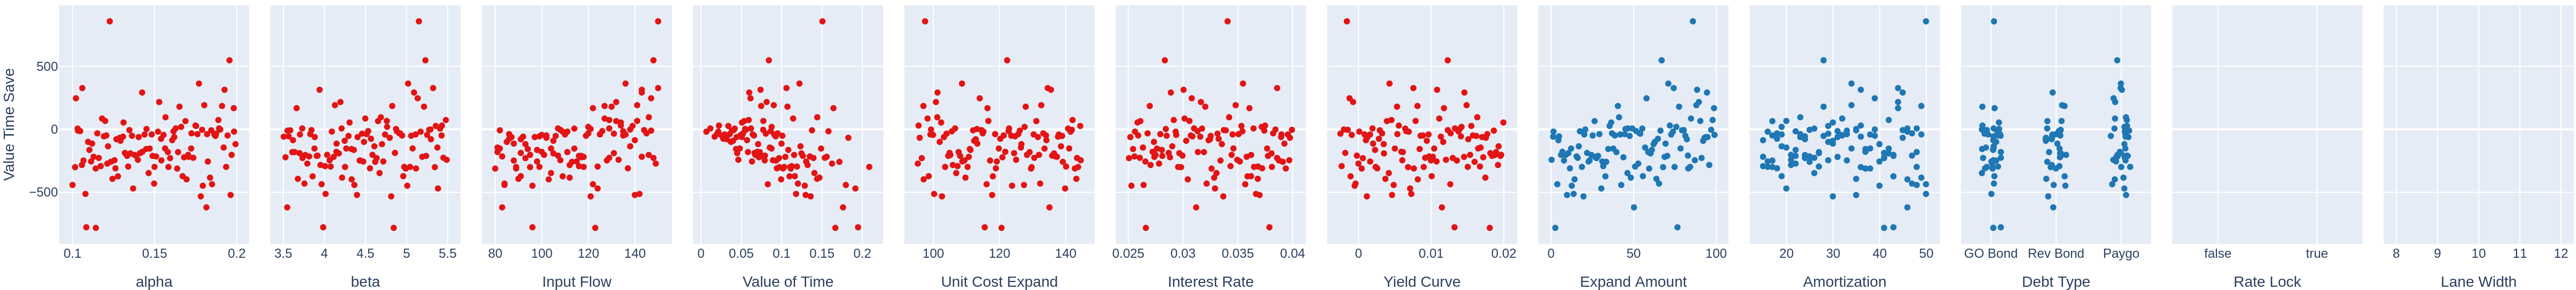

Net Benefits

<xmle.Elem 'img' with 0 children>
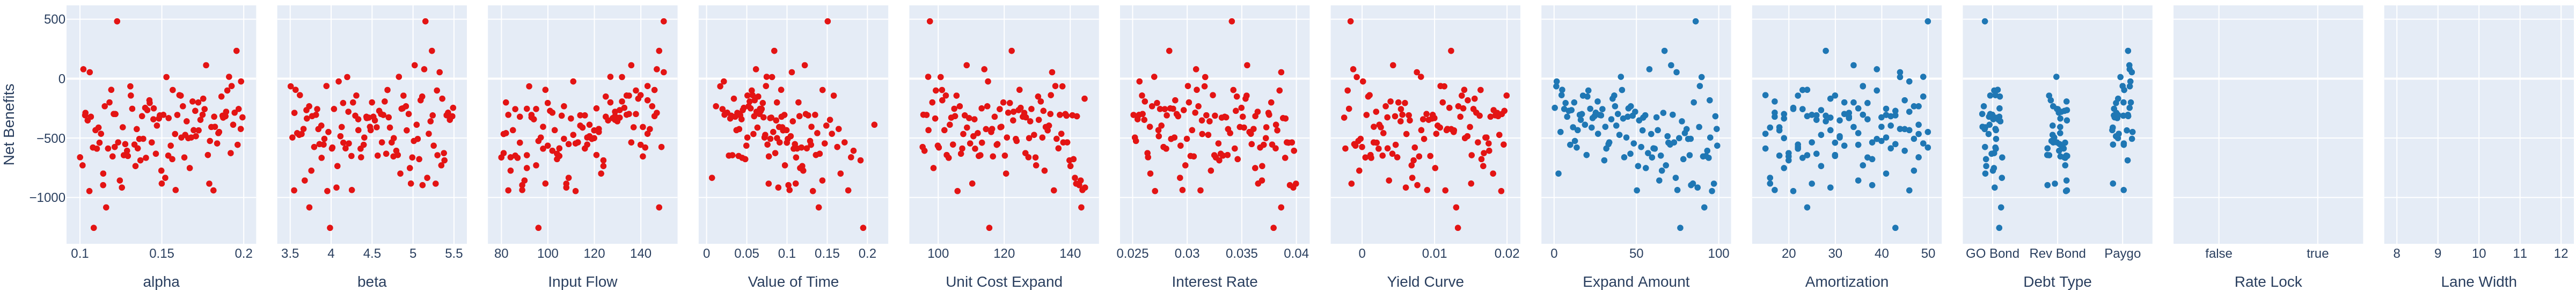

Cost of Expand

<xmle.Elem 'img' with 0 children>
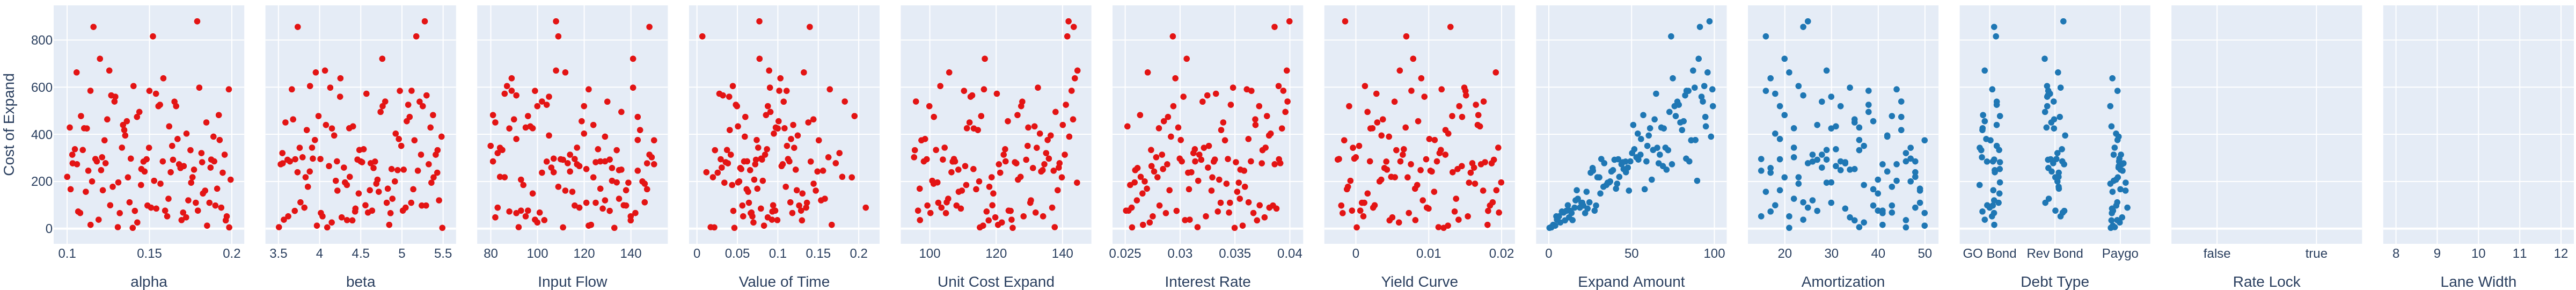

Present Cost

<xmle.Elem 'img' with 0 children>
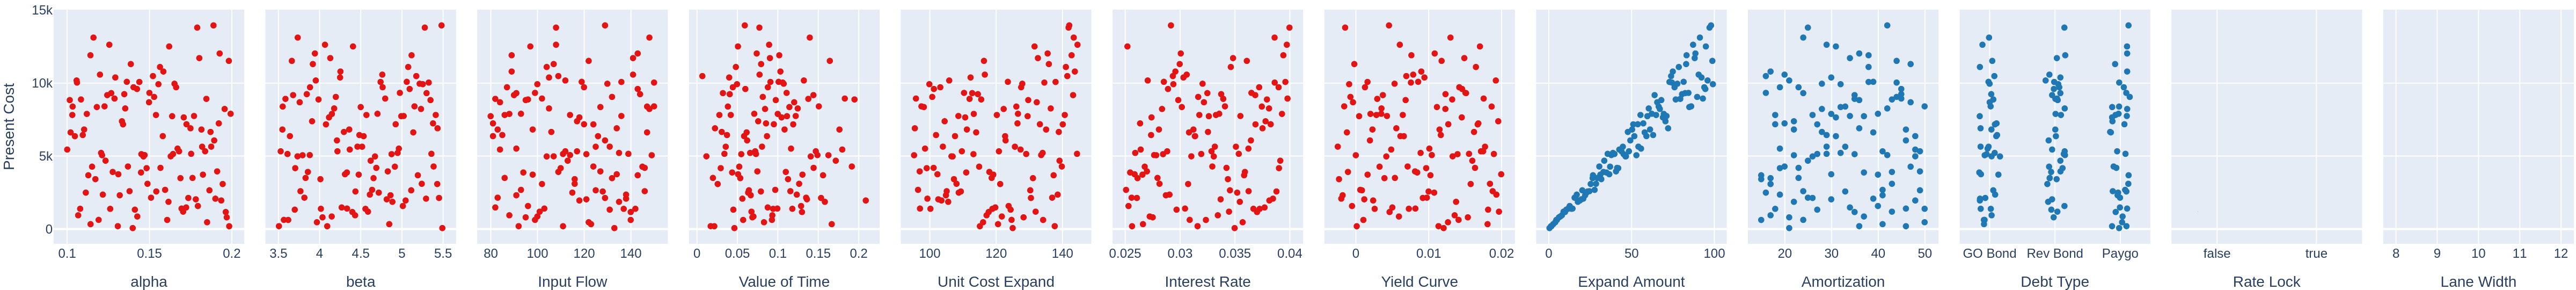

In [3]:
from emat.analysis import display_experiments
display_experiments(scope, results, render="png")

The unexpected non-monotonic response function in the second row
of figures should jump out at the analyst here as problematic.
If we are not expecting this kind of response, we should carefully
review the model code and results to figure out what (if anything)
is going wrong here.